<a href="https://colab.research.google.com/github/ZULYGARZONVILLALBA/GUIA-2/blob/main/Gu%C3%ADa3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gu√≠a 3**

## **¬øC√≥mo podemos controlar el creciente n√∫mero de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el n√∫mero de accidentes en las carreteras de la ciudad. Quieren saber si el n√∫mero de accidentes ha aumentado en las √∫ltimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el √∫ltimo a√±o y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudar√≠a a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos par√°metros como municipio, hora del d√≠a, motivo del accidente, etc. De los que se preocupan y de los que les gustar√≠a obtener informaci√≥n espec√≠fica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas espec√≠ficas que tiene el cliente, que se mencionan a continuaci√≥n.

**Contexto anal√≠tico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicaci√≥n del accidente, motivo del accidente, tipos de veh√≠culos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizar√° las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualizaci√≥n
2. Realizar an√°lisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto espec√≠fico de preguntas a las que le gustar√≠a obtener respuestas. Deber√° proporcionar visualizaciones para acompa√±ar estos:

1. ¬øC√≥mo ha fluctuado el n√∫mero de accidentes durante el √∫ltimo a√±o y medio? ¬øHan aumentado con el tiempo?
2. Para un d√≠a en particular, ¬ødurante qu√© horas es m√°s probable que ocurran accidentes?
3. ¬øHay m√°s accidentes entre semana que durante los fines de semana?
4. ¬øCu√°l es la proporci√≥n de recuento de accidentes por √°rea por municipio? ¬øQu√© distritos tienen un n√∫mero desproporcionadamente grande de accidentes para su tama√±o?
5. Para cada municipio, ¬ødurante qu√© horas es m√°s probable que ocurran accidentes?
6. ¬øCu√°les son las 5 principales causas de accidentes en la ciudad?
7. ¬øQu√© tipos de veh√≠culos est√°n m√°s involucrados en accidentes por municipio?
8. ¬øQu√© tipos de veh√≠culos est√°n m√°s involucrados en las muertes?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files

# Subir archivo desde tu PC
archivo_subido = files.upload()

Saving accidents-1.csv to accidents-1.csv


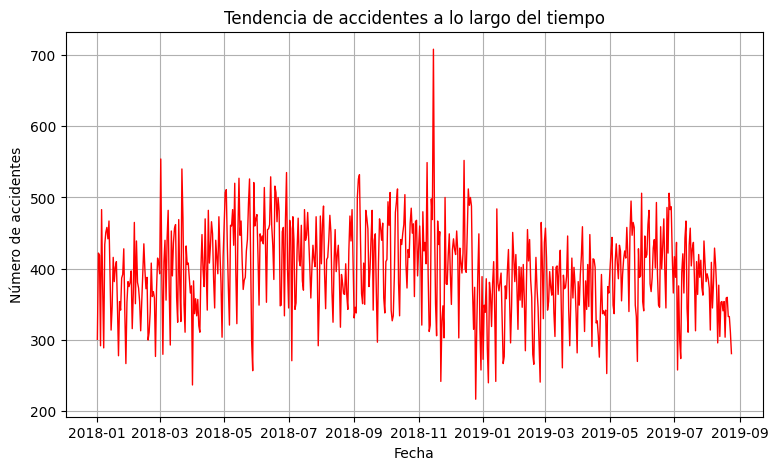

In [5]:
# Leer el archivo CSV
filename = list(archivo_subido.keys())[0]
df = pd.read_csv(filename, delimiter=';', parse_dates=['DATE'])

# Convertir la columna TIME a formato de hora
df['HOUR'] = pd.to_datetime(df['TIME'], format='%I:%M %p', errors='coerce').dt.hour

# 1. ¬øC√≥mo ha fluctuado el n√∫mero de accidentes durante el √∫ltimo a√±o y medio? ¬øHan aumentado con el tiempo?
accidents_per_day = df.groupby("DATE").size()
plt.figure(figsize=(9, 5))
plt.plot(accidents_per_day.index, accidents_per_day.values, color="red", linewidth=1)
plt.xlabel("Fecha")
plt.ylabel("N√∫mero de accidentes")
plt.title("Tendencia de accidentes a lo largo del tiempo")
plt.grid(True)
plt.show()

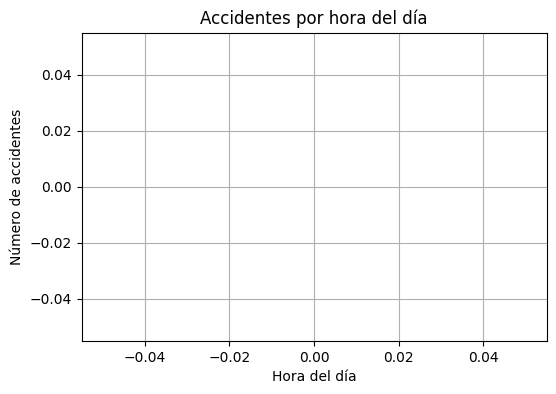

In [ ]:
# 2. Para un d√≠a en particular, ¬ødurante qu√© horas es m√°s probable que ocurran accidentes?
accidents_per_hour = df.groupby("HOUR").size()
plt.figure(figsize=(6, 4))
plt.bar(accidents_per_hour.index, accidents_per_hour.values, color="blue")
plt.xlabel("Hora del d√≠a")
plt.ylabel("N√∫mero de accidentes")
plt.title("Accidentes por hora del d√≠a")
plt.grid(True)
plt.show()

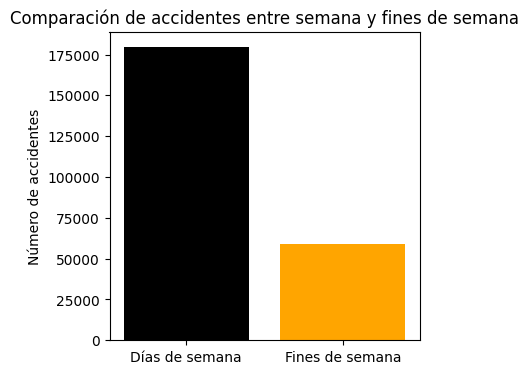

In [ ]:
# 3. ¬øHay m√°s accidentes entre semana que durante los fines de semana?
df['WEEKDAY'] = df['DATE'].dt.dayofweek
weekdays = df[df['WEEKDAY'] < 5].shape[0]
weekends = df[df['WEEKDAY'] >= 5].shape[0]
plt.figure(figsize=(4, 4))
plt.bar(["D√≠as de semana", "Fines de semana"], [weekdays, weekends], color=["black", "orange"])
plt.ylabel("N√∫mero de accidentes")
plt.title("Comparaci√≥n de accidentes entre semana y fines de semana")
plt.show()


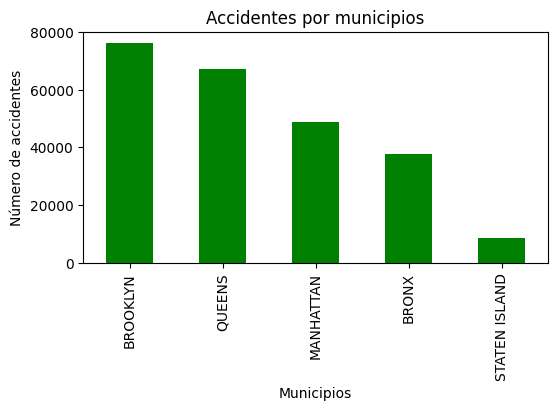

In [ ]:
# 4. ¬øCu√°l es la proporci√≥n de recuento de accidentes por √°rea por municipio?
district_counts = df['BOROUGH'].value_counts()
plt.figure(figsize=(6, 3))
district_counts.plot(kind='bar', color='green')
plt.xlabel("Municipios")
plt.ylabel("N√∫mero de accidentes")
plt.title("Accidentes por municipios")
plt.show()


In [ ]:
# 5. Para cada municipio, ¬ødurante qu√© horas es m√°s probable que ocurran accidentes?
# Eliminar filas con valores nulos en BOROUGH y HOUR
df_filtered = df.dropna(subset=['BOROUGH', 'HOUR'])

# Asegurar que la columna HOUR sea num√©rica
df_filtered['HOUR'] = pd.to_numeric(df_filtered['HOUR'], errors='coerce')

# Agrupar por municipio y hora
borough_hourly = df_filtered.groupby(['BOROUGH', 'HOUR']).size().unstack()

# Verificar que haya datos num√©ricos antes de graficar
if not borough_hourly.empty:
    borough_hourly = borough_hourly.fillna(0).astype(int)


In [ ]:
# 5. Para cada municipio, ¬ødurante qu√© horas es m√°s probable que ocurran accidentes?
df_filtered = df.dropna(subset=['BOROUGH', 'HOUR'])
df_filtered['HOUR'] = pd.to_numeric(df_filtered['HOUR'], errors='coerce')
borough_hourly = df_filtered.groupby(['BOROUGH', 'HOUR']).size().unstack()

if not borough_hourly.empty:
    borough_hourly = borough_hourly.fillna(0).astype(int)
    plt.figure(figsize=(12, 6))
    borough_hourly.T.plot(figsize=(12, 6), colormap='tab10')
    plt.xlabel("Hora del d√≠a")
    plt.ylabel("N√∫mero de accidentes")
    plt.title("Accidentes por hora en cada municipio")
    plt.legend(title='Municipio')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos suficientes para generar la gr√°fica de accidentes por hora en cada municipio.")

No hay datos suficientes para generar la gr√°fica de accidentes por hora en cada municipio.


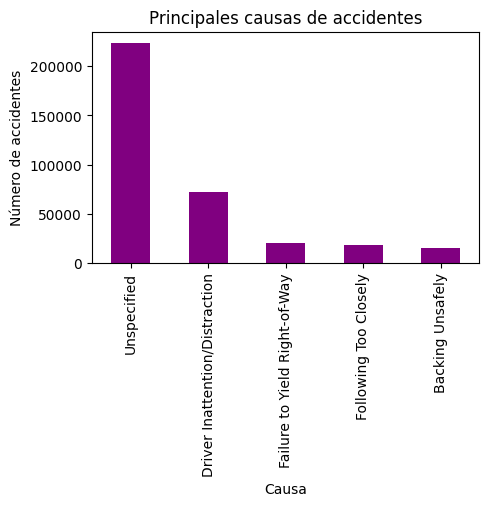

In [ ]:
# 6. ¬øCu√°les son las 5 principales causas de accidentes en la ciudad?
top_causes = df[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']].melt(value_name="FACTOR")
filtered_causes = top_causes[top_causes["FACTOR"].notna()]
top_causes_counts = filtered_causes["FACTOR"].value_counts().head(5)
plt.figure(figsize=(5, 3))
top_causes_counts.plot(kind='bar', color='purple')
plt.xlabel("Causa")
plt.ylabel("N√∫mero de accidentes")
plt.title("Principales causas de accidentes")
plt.show()

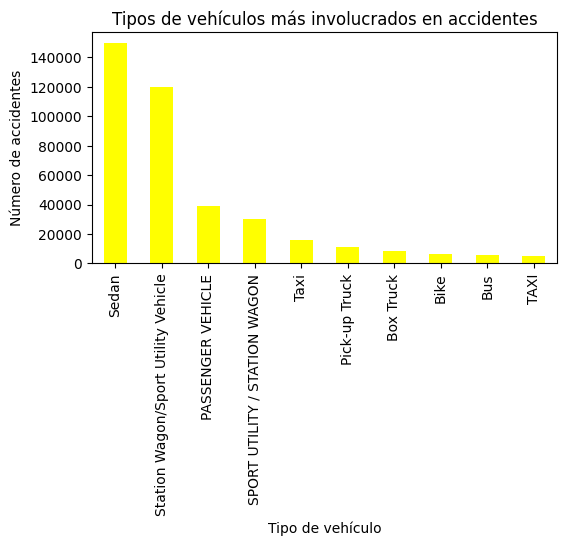

In [ ]:
# 7. ¬øQu√© tipos de veh√≠culos est√°n m√°s involucrados en accidentes por municipio?
vehicle_counts = df[['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']].melt(value_name="VEHICLE").groupby("VEHICLE").size()
vehicle_counts = vehicle_counts.drop("Unknown", errors="ignore").sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 3))
vehicle_counts.plot(kind='bar', color='yellow')
plt.xlabel("Tipo de veh√≠culo")
plt.ylabel("N√∫mero de accidentes")
plt.title("Tipos de veh√≠culos m√°s involucrados en accidentes")
plt.show()

In [ ]:
# 8. ¬øQu√© tipos de veh√≠culos est√°n m√°s involucrados en las muertes?
if 'NUMBER OF MOTORISTS DEATHS' in df.columns:
    fatal_vehicles = df[df['NUMBER OF MOTORISTS DEATHS'] > 0][['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']]
    fatal_vehicles = fatal_vehicles.melt(value_name="VEHICLE").dropna()
    fatal_vehicles_counts = fatal_vehicles["VEHICLE"].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    fatal_vehicles_counts.plot(kind='bar', color='black')
    plt.xlabel("Tipo de veh√≠culo")
    plt.ylabel("N√∫mero de accidentes fatales")
    plt.title("Veh√≠culos m√°s involucrados en accidentes fatales")
    plt.show()
else:
    print("La columna 'NUMBER OF MOTORISTS DEATHS' no se encuentra en los datos.")


La columna 'NUMBER OF MOTORISTS DEATHS' no se encuentra en los datos.


Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene informaci√≥n detallada sobre accidentes de tr√°nsito registrados en la ciudad de Nueva York. A continuaci√≥n, se presenta la descripci√≥n de cada columna:

- **BOROUGH**. Municipio donde ocurri√≥ el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador √∫nico asignado a cada colisi√≥n para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracci√≥n del conductor, fallas mec√°nicas, malas condiciones clim√°ticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un veh√≠culo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal m√°s cercana al lugar del accidente, √∫til para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurri√≥ el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** N√∫mero de personas heridas en el accidente, clasificadas en tres categor√≠as: Ciclistas, Motociclistas - conductores de veh√≠culos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** N√∫mero de v√≠ctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de veh√≠culos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurri√≥ el accidente, informaci√≥n clave para el an√°lisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de veh√≠culos involucrados en el accidente, pudiendo haber hasta cinco veh√≠culos registrados por accidente.
Sed√°n, SUV, Cami√≥n, Motocicleta, Autob√∫s, Bicicleta, etc.

- **ZIP CODE**  C√≥digo postal correspondiente a la ubicaci√≥n del accidente, √∫til para agrupar eventos por √°reas espec√≠ficas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputaci√≥n de los valores faltantes en las columnas que presentan datos nulos. A continuaci√≥n, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el m√©todo de imputaci√≥n**

Dado el an√°lisis de valores nulos, se aplicar√°n diferentes estrategias de imputaci√≥n seg√∫n el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputar√° con el c√≥digo postal m√°s frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazar√°n los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME ser√° rellenada con "UNKNOWN" en caso de estar vac√≠a. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos ser√°n sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazar√°n con "Unknown" para asegurar la integridad del an√°lisis.

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el n√∫mero de muertes por accidentes de tr√°nsito para el a√±o 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuaci√≥n, se presentan algunas de las medidas adoptadas en el plan:

- [ ] Detecci√≥n automatizada de peatones para mejorar la seguridad en los cruces.
- [ ] Auditor√≠as de seguridad vial en zonas con alta incidencia de accidentes.
- [ ] Expansi√≥n de la red de carriles para bicicletas para reducir la exposici√≥n de ciclistas a incidentes con veh√≠culos.
- [ ] Programas de educaci√≥n y sensibilizaci√≥n para fomentar el respeto a las normas de tr√°nsito.
- [ ] Construcci√≥n de islas de refugio peatonal para mejorar la seguridad en calles de alto tr√°fico.
- [ ] Implementaci√≥n de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el an√°lisis de datos.

**Pregunta: ¬øCu√°les de estas iniciativas podr√≠an beneficiarse directamente del an√°lisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opci√≥n, agregue una "[x]" en la casilla correspondiente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Subir archivo desde tu PC
archivo_subido = files.upload()

Saving accidents-1.csv to accidents-1.csv


Columnas presentes en el DataFrame:
Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

Valores nulos por columna:
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTIN

<ipython-input-90-da46a742935c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ZIP CODE'].fillna(df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)
<ipython-input-90-da46a742935c>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Ejemplo de valores en la columna TIME:
0    12:12
1    16:30
2    19:30
3    13:10
4    22:40
Name: TIME, dtype: object


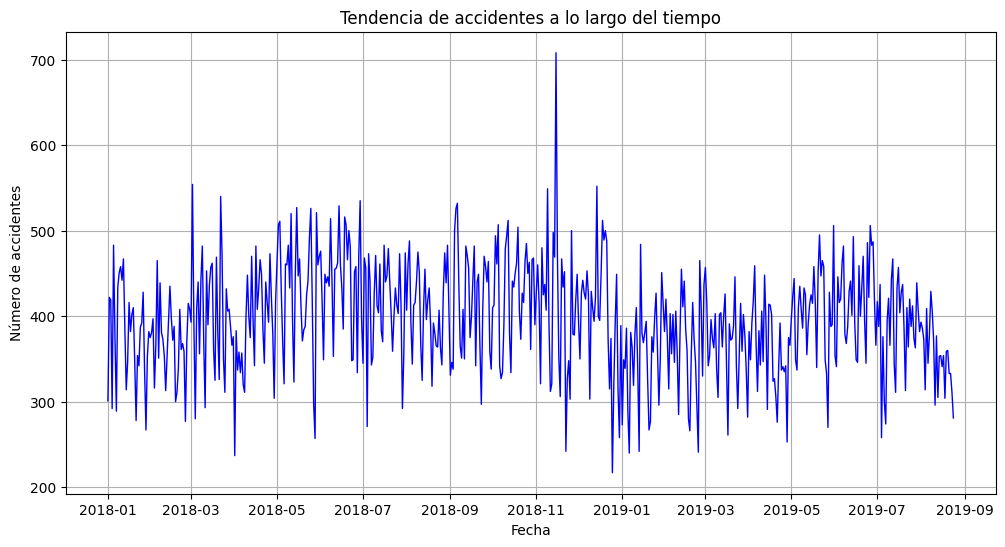

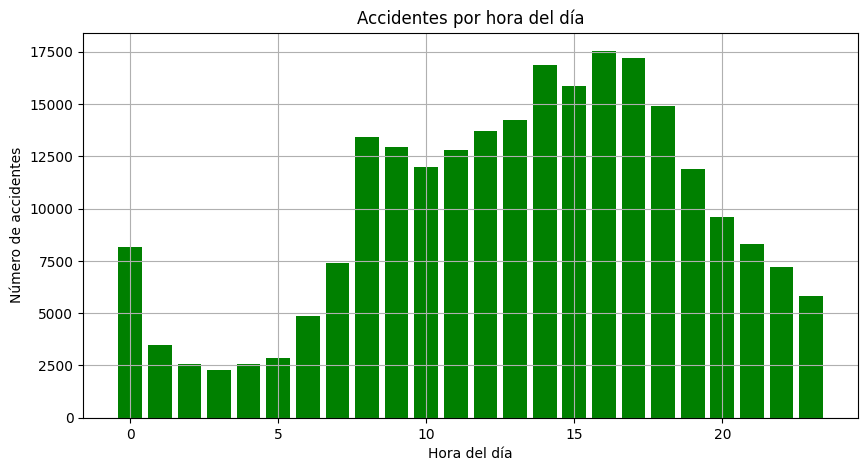

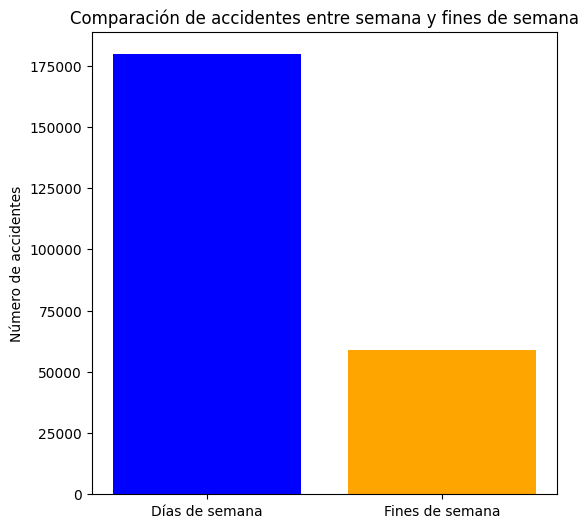

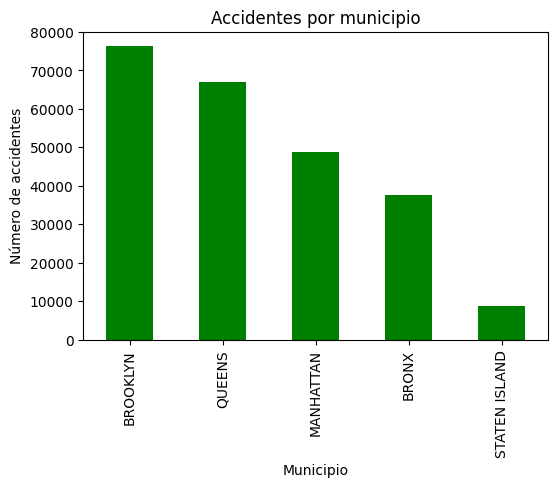

<Figure size 1000x500 with 0 Axes>

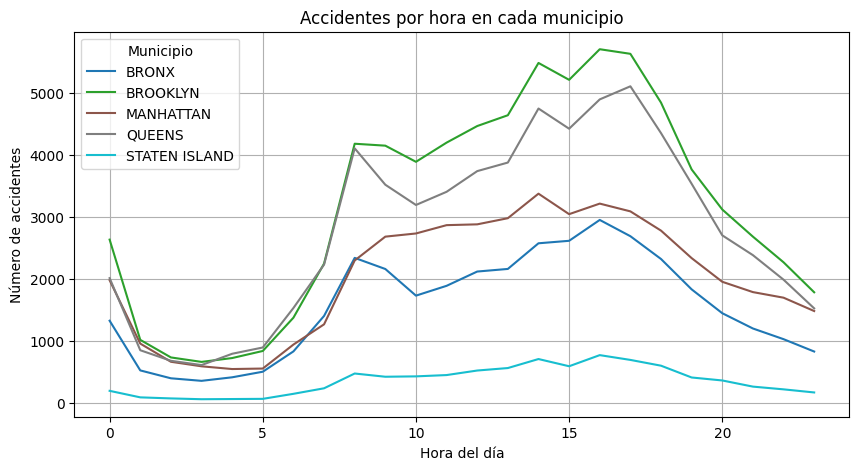

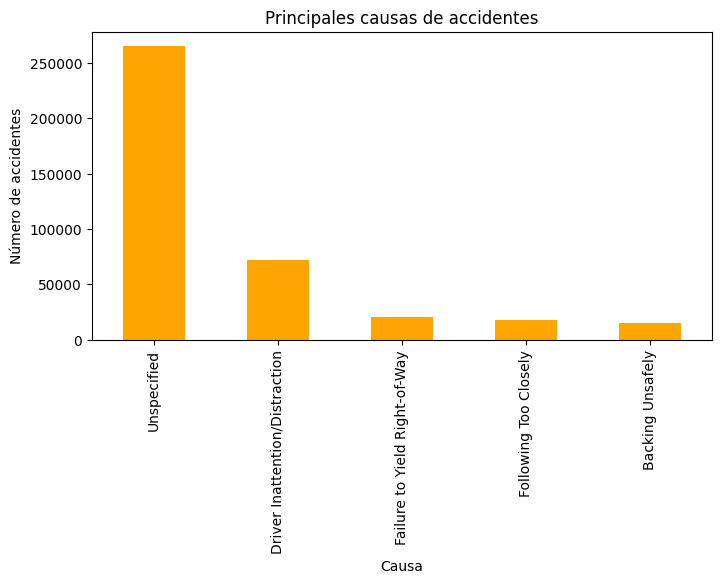

In [ ]:
# Leer el archivo CSV
filename = list(archivo_subido.keys())[0]
df = pd.read_csv(filename, delimiter=';', parse_dates=['DATE'])

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Mostrar las columnas del DataFrame
print("Columnas presentes en el DataFrame:")
print(df.columns)

# Identificar valores nulos
total_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(total_nulos[total_nulos > 0])

# Imputaci√≥n de valores faltantes
df['ZIP CODE'].fillna(df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'), inplace=True)
df['LATITUDE'].fillna(df.groupby('BOROUGH')['LATITUDE'].transform('mean'), inplace=True)
df['LONGITUDE'].fillna(df.groupby('BOROUGH')['LONGITUDE'].transform('mean'), inplace=True)
df['ON STREET NAME'].fillna('UNKNOWN', inplace=True)
for i in range(1, 6):
    factor_col = f'CONTRIBUTING FACTOR VEHICLE {i}'
    vehicle_col = f'VEHICLE TYPE CODE {i}'
    if factor_col in df.columns:
        df[factor_col].fillna('Unspecified', inplace=True)
    if vehicle_col in df.columns:
        df[vehicle_col].fillna('Unknown', inplace=True)

# Verificar formato de la columna TIME
print("Ejemplo de valores en la columna TIME:")
print(df['TIME'].head())

# Intentar convertir la columna TIME a formato de hora con m√∫ltiples formatos
formats = ['%I:%M %p', '%H:%M', '%H:%M:%S']
for fmt in formats:
    try:
        df['HOUR'] = pd.to_datetime(df['TIME'], format=fmt, errors='coerce').dt.hour
        if df['HOUR'].notna().sum() > 0:
            break
    except Exception as e:
        print(f"Error con formato {fmt}: {e}")

# Eliminar valores nulos en HOUR
df = df.dropna(subset=['HOUR'])

# 1. ¬øC√≥mo ha fluctuado el n√∫mero de accidentes durante el √∫ltimo a√±o y medio? ¬øHan aumentado con el tiempo?
accidents_per_day = df.groupby("DATE").size()
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_day.index, accidents_per_day.values, color="blue", linewidth=1)
plt.xlabel("Fecha")
plt.ylabel("N√∫mero de accidentes")
plt.title("Tendencia de accidentes a lo largo del tiempo")
plt.grid(True)
plt.show()

# 2. Para un d√≠a en particular, ¬ødurante qu√© horas es m√°s probable que ocurran accidentes?
accidents_per_hour = df.groupby("HOUR").size()
plt.figure(figsize=(10, 5))
plt.bar(accidents_per_hour.index, accidents_per_hour.values, color="green")
plt.xlabel("Hora del d√≠a")
plt.ylabel("N√∫mero de accidentes")
plt.title("Accidentes por hora del d√≠a")
plt.grid(True)
plt.show()

# 3. ¬øHay m√°s accidentes entre semana que durante los fines de semana?
df['WEEKDAY'] = df['DATE'].dt.dayofweek
weekdays = df[df['WEEKDAY'] < 5].shape[0]
weekends = df[df['WEEKDAY'] >= 5].shape[0]
plt.figure(figsize=(6, 6))
plt.bar(["D√≠as de semana", "Fines de semana"], [weekdays, weekends], color=["blue", "orange"])
plt.ylabel("N√∫mero de accidentes")
plt.title("Comparaci√≥n de accidentes entre semana y fines de semana")
plt.show()

# 4. ¬øCu√°l es la proporci√≥n de recuento de accidentes por √°rea por municipio?
district_counts = df['BOROUGH'].value_counts()
plt.figure(figsize=(6, 4))
district_counts.plot(kind='bar', color='green')
plt.xlabel("Municipio")
plt.ylabel("N√∫mero de accidentes")
plt.title("Accidentes por municipio")
plt.show()

# 5. Para cada municipio, ¬ødurante qu√© horas es m√°s probable que ocurran accidentes?
df_filtered = df.dropna(subset=['BOROUGH', 'HOUR'])
df_filtered['HOUR'] = pd.to_numeric(df_filtered['HOUR'], errors='coerce')
borough_hourly = df_filtered.groupby(['BOROUGH', 'HOUR']).size().unstack()

if not borough_hourly.empty:
    borough_hourly = borough_hourly.fillna(0).astype(int)
    plt.figure(figsize=(10, 5))
    borough_hourly.T.plot(figsize=(10, 5), colormap='tab10')
    plt.xlabel("Hora del d√≠a")
    plt.ylabel("N√∫mero de accidentes")
    plt.title("Accidentes por hora en cada municipio")
    plt.legend(title='Municipio')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos suficientes para generar la gr√°fica de accidentes por hora en cada municipio.")

# 6. ¬øCu√°les son las 5 principales causas de accidentes en la ciudad?
top_causes = df[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']].melt(value_name="FACTOR")
filtered_causes = top_causes[top_causes["FACTOR"].notna()]
top_causes_counts = filtered_causes["FACTOR"].value_counts().head(5)
plt.figure(figsize=(8, 4))
top_causes_counts.plot(kind='bar', color='orange')
plt.xlabel("Causa")
plt.ylabel("N√∫mero de accidentes")
plt.title("Principales causas de accidentes")
plt.show()


### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¬øHa aumentado el n√∫mero de accidentes durante el √∫ltimo a√±o y medio?

**Sugerencia**: Puede encontrar √∫tiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


El gr√°fico de l√≠neas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gr√°fica anterior, ¬øqu√© meses parecen tener el menor n√∫mero de accidentes? ¬øCu√°les crees que son las razones detr√°s de esto?

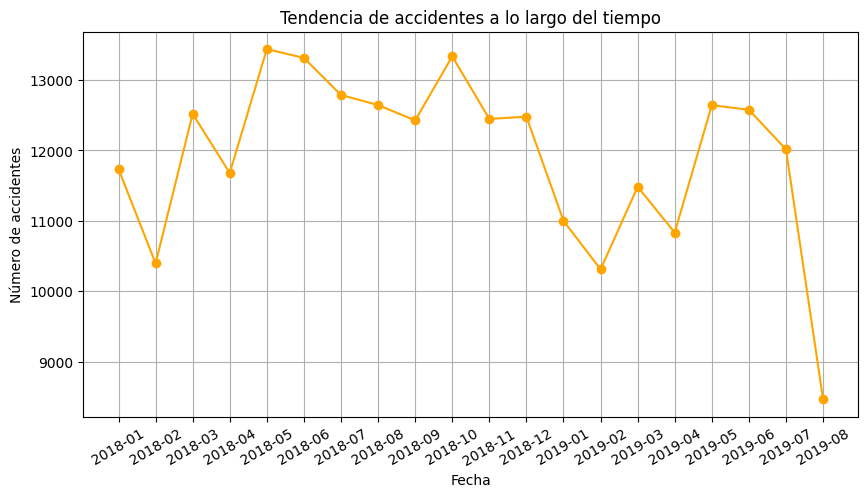

Meses con menor n√∫mero de accidentes:
YEAR_MONTH
2019-08     8466
2019-02    10310
2018-02    10395
Freq: M, dtype: int64


In [ ]:
# Agrupar los datos por mes y contar la cantidad de accidentes
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')
accidents_per_month = df.groupby('YEAR_MONTH').size()

# Graficar la tendencia de accidentes
plt.figure(figsize=(10, 5))
plt.plot(accidents_per_month.index.astype(str), accidents_per_month.values, marker='o', linestyle='-', color='orange')
plt.xlabel("Fecha")
plt.ylabel("N√∫mero de accidentes")
plt.title("Tendencia de accidentes a lo largo del tiempo")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

# Identificar los meses con el menor n√∫mero de accidentes
min_accidents_months = accidents_per_month.nsmallest(3)  # Obtener los 3 meses con menos accidentes
print("Meses con menor n√∫mero de accidentes:")
print(min_accidents_months)

### Exjercicio 3:
¬øC√≥mo var√≠a el n√∫mero de accidentes a lo largo de un solo d√≠a? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gr√°fico de barras de la distribuci√≥n por hora a lo largo del d√≠a.

**Sugerencia:** Puede encontrar √∫til la funci√≥n ```dt.hour```.

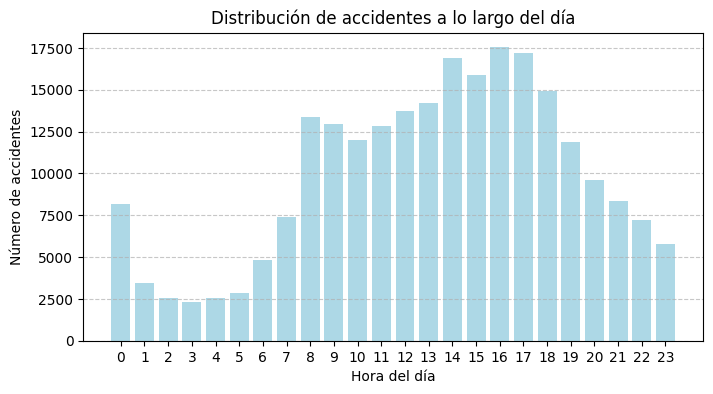

In [ ]:
# Convertir la columna TIME a formato de hora
df['HOUR'] = pd.to_datetime(df['TIME'], format='%H:%M', errors='coerce').dt.hour

# Agrupar los accidentes por hora del d√≠a
accidents_per_hour = df.groupby('HOUR').size()

# Graficar la distribuci√≥n de accidentes por hora
plt.figure(figsize=(8, 4))
plt.bar(accidents_per_hour.index, accidents_per_hour.values, color="lightblue")
plt.xlabel("Hora del d√≠a")
plt.ylabel("N√∫mero de accidentes")
plt.title("Distribuci√≥n de accidentes a lo largo del d√≠a")
plt.xticks(range(24))  # Asegurar que todas las horas aparezcan en el eje X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Soluci√≥n propuesta

En la pregunta anterior hemos agregado el n√∫mero de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¬øQu√© cr√≠tica le dar√≠a a este enfoque?

El principal problema de este enfoque es que **ignora el contexto en el que ocurren los accidentes**, lo que puede llevar a conclusiones incompletas o imprecisas. Algunas limitaciones clave son: 1. **Falta de segmentaci√≥n geogr√°fica**: - No distingue entre diferentes zonas de la ciudad, donde los patrones de tr√°fico pueden variar significativamente. - Algunas √°reas pueden tener mayor flujo vehicular o condiciones espec√≠ficas que influyen en la siniestralidad. 2. **D

### Ejercicio 4:

¬øC√≥mo var√≠a el n√∫mero de accidentes en una sola semana? Trace un gr√°fico de barras basado en el recuento de accidentes por d√≠a de la semana.

**Sugerencia:** Puede encontrar √∫til la funci√≥n ```dt.weekday```.

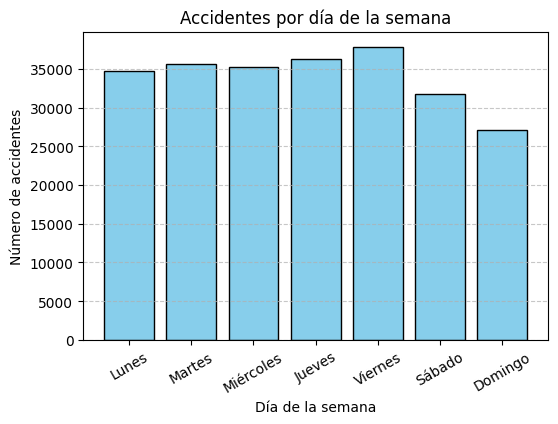

In [ ]:
# Crear una nueva columna con el d√≠a de la semana (0 = Lunes, 6 = Domingo)
df['WEEKDAY'] = df['DATE'].dt.weekday

# Contar el n√∫mero de accidentes por d√≠a de la semana
accidents_per_weekday = df['WEEKDAY'].value_counts().sort_index()

# Nombres de los d√≠as de la semana
days_labels = ['Lunes', 'Martes', 'Mi√©rcoles', 'Jueves', 'Viernes', 'S√°bado', 'Domingo']

# Graficar los datos
plt.figure(figsize=(6,4 ))
plt.bar(days_labels, accidents_per_weekday, color='skyblue', edgecolor='black')
plt.xlabel("D√≠a de la semana")
plt.ylabel("N√∫mero de accidentes")
plt.title("Accidentes por d√≠a de la semana")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Soluci√≥n propuesta

### Ejercicio 5:

Trace una gr√°fica de barras del n√∫mero total de accidentes en cada municipio, as√≠ como uno de los accidentes por milla cuadrada por municipio. ¬øQu√© puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

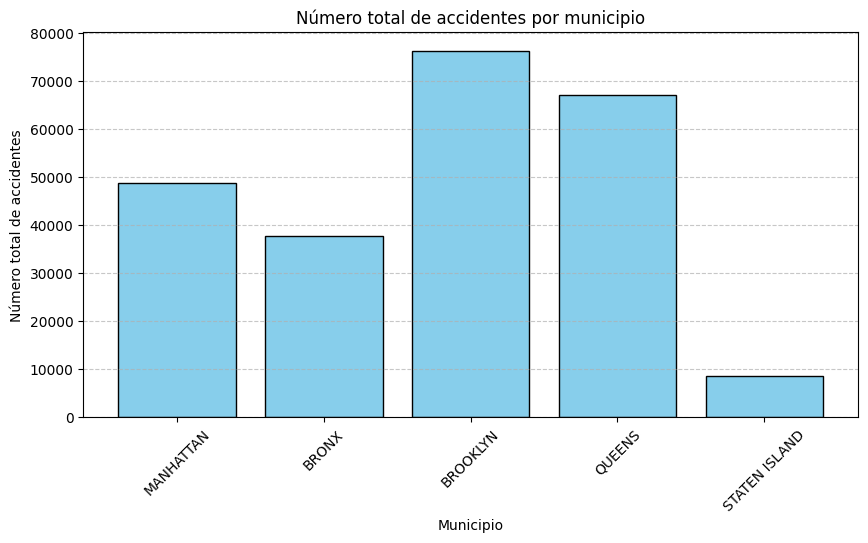

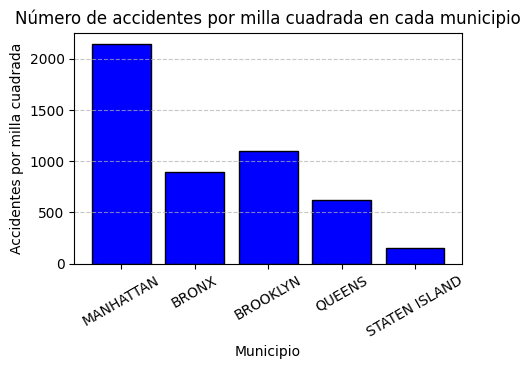

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df ya tiene una columna 'BOROUGH' con los municipios
# Contar el n√∫mero total de accidentes por municipio
accidents_per_borough = df['BOROUGH'].value_counts()

# Definir el √°rea de cada municipio en millas cuadradas (datos aproximados)
borough_areas = {
    'MANHATTAN': 22.7,
    'BRONX': 42.2,
    'BROOKLYN': 69.4,
    'QUEENS': 108.7,
    'STATEN ISLAND': 58.5
}

# Filtrar solo municipios que est√©n en el diccionario de √°reas
accidents_per_borough = accidents_per_borough[borough_areas.keys()]

# Calcular accidentes por milla cuadrada
accidents_per_mile = accidents_per_borough / pd.Series(borough_areas)

# Gr√°fico del n√∫mero total de accidentes por municipio
plt.figure(figsize=(10, 5))
plt.bar(accidents_per_borough.index, accidents_per_borough.values, color='skyblue', edgecolor='black')
plt.xlabel("Municipio")
plt.ylabel("N√∫mero total de accidentes")
plt.title("N√∫mero total de accidentes por municipio")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gr√°fico de accidentes por milla cuadrada
plt.figure(figsize=(5, 3))
plt.bar(accidents_per_mile.index, accidents_per_mile.values, color='blue', edgecolor='black')
plt.xlabel("Municipio")
plt.ylabel("Accidentes por milla cuadrada")
plt.title("N√∫mero de accidentes por milla cuadrada en cada municipio")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Posibles Conclusiones:
üìå Un municipio con m√°s accidentes totales no significa necesariame
üìå *Si un municipio tiene m√°s accidentes por milla cuadrada , su d
üìå **Probablemente ManhattanManhattan probablemente tenga la mayor densidad de accidentes , dado su tama√±o r

üö¶ ¬°Este an√°lisis puede ayudar a priorizar medidas de seguridad en √°reas con mayor densidad de accidentes! üöß

In [ ]:
# Soluci√≥n propuesta

Podemos ver que Brooklyn y Queens tienen un n√∫mero muy alto de accidentes en relaci√≥n con los otros tres condados. Pero, ¬øqu√© tal por milla cuadrada?

Aunque Brooklyn y Queens tienen un alto n√∫mero total de accidentes, esto no significa necesariamente que sean las √°reas m√°s peligrosas. Para una mejor evaluaci√≥n, es importante considerar los accidentes por milla cuadrada :

Brooklyn , debido a su alta densmayor cantidad de accidentes por milla cuadrada en
Reinas ,
Manhattan , estafamayor concentraci√≥n de accidentes por milla cuadrada .
Staten Island , tambi√©n conocida como
Conclusi√≥n:
Si solo observamos los n√∫meros totales, podr√≠amos pensar que Brooklyn y Queens son las zonas m√°s afectadas. Sin embargo, al calcular los accidentes por milla cuadrada ,√Årea del mar de Manhattan

### Ejercicio 6:

¬øQu√© horas tienen m√°s accidentes en cada municipio? Trace un gr√°fico de barras para cada municipio que muestre el n√∫mero de accidentes por cada hora del d√≠a.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadr√≠cula de parcelas con los datos por hora de cada municipio.

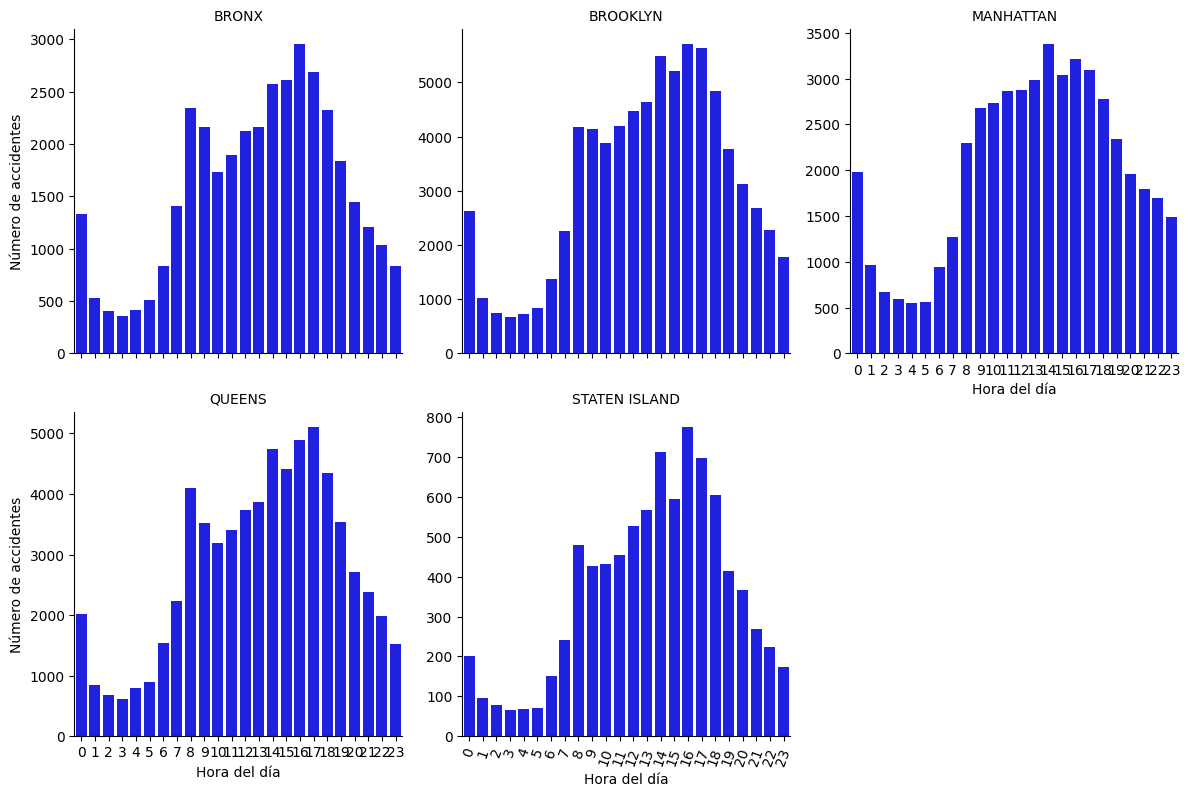

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar accidentes por municipio y hora
df_grouped = df_filtered.groupby(['BOROUGH', 'HOUR']).size().reset_index(name='COUNT')

# Crear el gr√°fico de barras con FacetGrid
g = sns.FacetGrid(df_grouped, col="BOROUGH", col_wrap=3, sharey=False, height=4)
g.map_dataframe(sns.barplot, x="HOUR", y="COUNT", color="blue")

# Ajustar dise√±o
g.set_axis_labels("Hora del d√≠a", "N√∫mero de accidentes")
g.set_titles(col_template="{col_name}")
plt.xticks(rotation=70)

# Mostrar gr√°fico
plt.show()


**¬øEs mayor el n√∫mero de accidentes en diferentes momentos en diferentes distritos? ¬øDeber√≠amos concentrarnos en diferentes momentos para cada municipio?**

üìä S√≠, el n√∫mero de accidentes üöóüí• var√≠a a lo largo del d√≠a seg√∫n el distrito. Factores como el tr√°fico üö¶, la densidad poblacional üèôÔ∏è y las actividades comerciales üè¢ afectan los picos de incidentes en cada zona.

üîπ Manhattan üèôÔ∏è: M√°s accidentes durante las horas pico de oficina ‚è∞üè¢.
üîπ Brooklyn y Queens üè°üö≤: Aumentan en las ma√±anas üåÖ y tar

‚úÖ Conclusi√≥n : S√≠, debe

### Ejercicio 7:

¬øQu√© factores provocan la mayor√≠a de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus √≠ndices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el n√∫mero de repeticiones de factores contribuidos por accidente.

<ipython-input-126-830103318232>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=factor_counts['Factor'][:10], x=factor_counts['Count'][:10], palette='viridis')


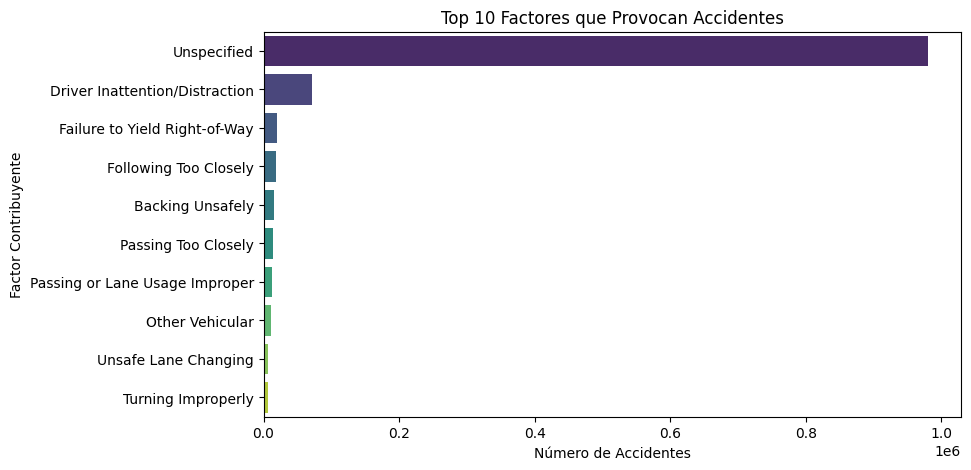

In [ ]:
# ¬øPara cada municipio, durante qu√© horas es m√°s probable que ocurran accidentes?
df_filtered = df.dropna(subset=['BOROUGH', 'HOUR'])
df_filtered['HOUR'] = pd.to_numeric(df_filtered['HOUR'], errors='coerce')

# Obtener factores contribuyentes en una sola columna
factor_columns = [f'CONTRIBUTING FACTOR VEHICLE {i}' for i in range(1, 6) if f'CONTRIBUTING FACTOR VEHICLE {i}' in df.columns]
factors = pd.concat([df[col] for col in factor_columns], axis=0).reset_index(drop=True)

# Contar ocurrencias de cada factor
factor_counts = factors.value_counts().reset_index()
factor_counts.columns = ['Factor', 'Count']

# Graficar los 10 factores m√°s comunes
plt.figure(figsize=(9, 5))
sns.barplot(y=factor_counts['Factor'][:10], x=factor_counts['Count'][:10], palette='viridis')
plt.xlabel("N√∫mero de Accidentes")
plt.ylabel("Factor Contribuyente")
plt.title("Top 10 Factores que Provocan Accidentes")
plt.show()


In [ ]:
# Soluci√≥n propuesta

### Ejercicio 8:

¬øQu√© tipos de veh√≠culos est√°n m√°s involucrados en accidentes por municipio? Evite contar dos veces el tipo de veh√≠culos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

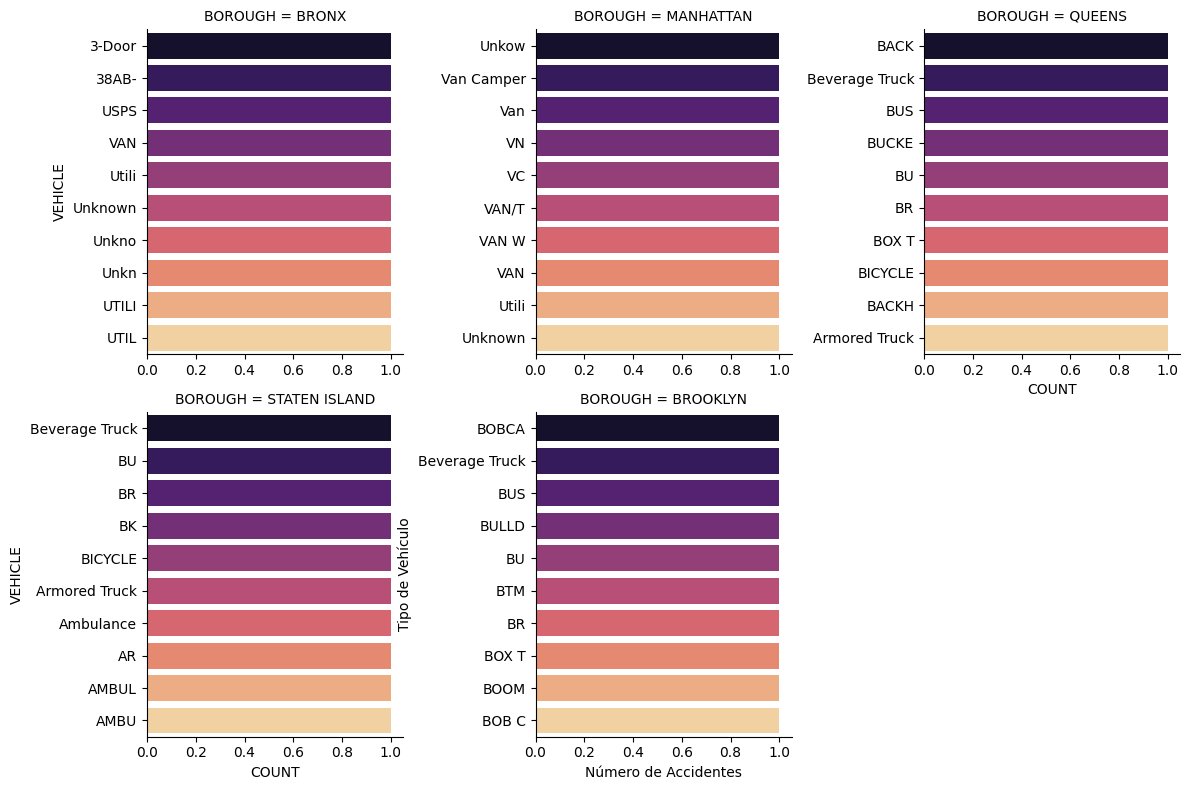

In [ ]:
# Ejercicio 8: Tipos de veh√≠culos involucrados en accidentes por municipio
vehicle_columns = [f'VEHICLE TYPE CODE {i}' for i in range(1, 6) if f'VEHICLE TYPE CODE {i}' in df.columns]
vehicles = pd.concat([df[['BOROUGH', col]].dropna().rename(columns={col: 'VEHICLE'}) for col in vehicle_columns])
vehicles = vehicles.drop_duplicates().reset_index(drop=True)

# Contar ocurrencias de cada tipo de veh√≠culo por municipio
vehicle_counts = vehicles.groupby(['BOROUGH', 'VEHICLE']).size().reset_index(name='COUNT')

# Graficar los 10 tipos de veh√≠culos m√°s comunes por municipio
g = sns.FacetGrid(vehicle_counts.sort_values('COUNT', ascending=False).groupby('BOROUGH').head(10), col='BOROUGH', col_wrap=3, sharex=False, sharey=False, height=4)
g.map_dataframe(sns.barplot, x='COUNT', y='VEHICLE', palette='magma')
plt.xlabel("N√∫mero de Accidentes")
plt.ylabel("Tipo de Veh√≠culo")
plt.show()



In [ ]:
# Soluci√≥n propuesta

### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declar√≥ que *'Vision Zero est√° funcionando claramente'*. Ese a√±o, el n√∫mero de muertes en accidentes de tr√°fico en Nueva York se redujo a un hist√≥rico 202. Sin embargo, seg√∫n lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el n√∫mero de v√≠ctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparaci√≥n con el a√±o anterior y el n√∫mero de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¬øC√≥mo utilizar√≠a los datos proporcionados para comprender qu√© sali√≥ mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas m√°s comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. D√© una recomendaci√≥n basada √∫nicamente en esta informaci√≥n.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay alg√∫n cambio en la concentraci√≥n de accidentes. En √°reas cr√≠ticas, estudie el tipo de factores involucrados en los accidentes. D√© una recomendaci√≥n para visitar estas √°reas para estudiar m√°s el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensi√≥n de la situaci√≥n.

> - [ ] Ninguna de las anteriores. Har√≠a lo siguiente: *aqu√≠ tu respuesta recomendada*.

In [ ]:
# Soluci√≥n propuesta

### Ejercicio 10:

Calcula el n√∫mero de muertes provocadas por cada tipo de veh√≠culo. Trace un gr√°fico de barras para los 5 veh√≠culos principales. ¬øQu√© veh√≠culos est√°n involucrados con mayor frecuencia en las muertes y cu√°nto m√°s que los dem√°s?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 veh√≠culos: 4 son VEH√çCULOS DE PASAJEROS y 1 es un VAG√ìN DEPORTIVO / ESTACI√ìN. Luego, agregar√≠amos dos muertes a cada tipo de VEH√çCULO DE PASAJEROS y VAG√ìN DE ESTACI√ìN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el n√∫mero total de muertes en el accidente. Para eso, puede encontrar √∫til la funci√≥n ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de veh√≠culos.